
# 🧠 Employee Attrition & Performance Prediction System

### 📂 Dataset

* **Single Dataset Used:** `Employee-Attrition.xlsx`

  * Predicting **two different targets** from the same dataset:

    * 🧳 **Attrition** – Whether an employee will leave or stay
    * 🌟 **Performance Rating** – Employee’s performance score



### Workflow Steps
<h4>
⚙️ Load Dataset → 🧹 Data Cleaning & Preprocessing → 🧩 Feature Identification → 🔠 Encoding → <br>📊 Exploratory Data Analysis (EDA) → 🔗 Correlation Analysis → 🎯 Feature Selection →  <br>📏 Feature Scaling → ⚖️ Class Imbalance Handling → ✂️ Train–Test Split → 🤖 Model Training & Evaluation → <br> 🎛️ Hyperparameter Tuning → 🏆 Model Comparison & Final Summary


# Importing Necessary Libraries

In [16]:
# ==========================================================
# Importing Necessary Libraries
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [17]:

# ==========================================================
# Load Dataset
# ==========================================================
df = pd.read_excel("Employee-Attrition.xlsx")
print("Initial Shape:", df.shape)
print(df.info())
print("Columns:", df.columns.tolist())
print(df.describe())


Initial Shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

# Data Cleaning and preprocessing

In [18]:

# ==========================================================
# Data Cleaning and preprocessing
# ==========================================================
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df = df.drop(columns=drop_cols)
print("After Dropping Useless Columns:", df.shape)

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
print("Attrition Distribution:\n", df['Attrition'].value_counts())
print("Performance Rating Distribution:\n", df['PerformanceRating'].value_counts())

# ==========================================================
# Identify Categorical & Numeric Columns
# ==========================================================
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical Columns:\n", cat_cols)
print("Numeric Columns:\n", num_cols)

# ==========================================================
# Encoding: One-Hot for Nominal, Label for Ordinal
# ==========================================================
# Nominal categorical variables (no order)
nominal_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Ordinal categorical variables (if any exist in your dataset)
# For simplicity, let's assume 'Education' and 'JobInvolvement' are ordinal-like (if present)
ordinal_cols = []
if 'Education' in df.columns:
    ordinal_cols.append('Education')
if 'JobSatisfaction' in df.columns:
    ordinal_cols.append('JobSatisfaction')

# Label Encoding for Ordinal Columns
le = LabelEncoder()
for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for Nominal Columns
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


After Dropping Useless Columns: (1470, 31)
Attrition Distribution:
 Attrition
0    1233
1     237
Name: count, dtype: int64
Performance Rating Distribution:
 PerformanceRating
3    1244
4     226
Name: count, dtype: int64
Categorical Columns:
 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numeric Columns:
 ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


#EDA - Exploratory Data Analysis

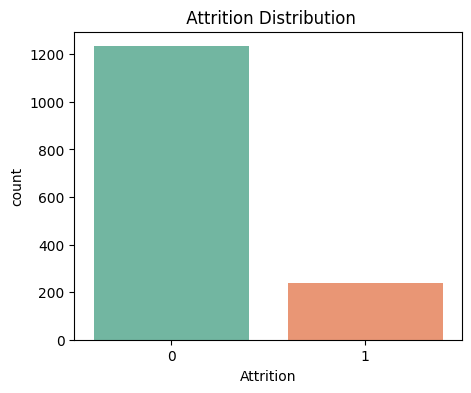

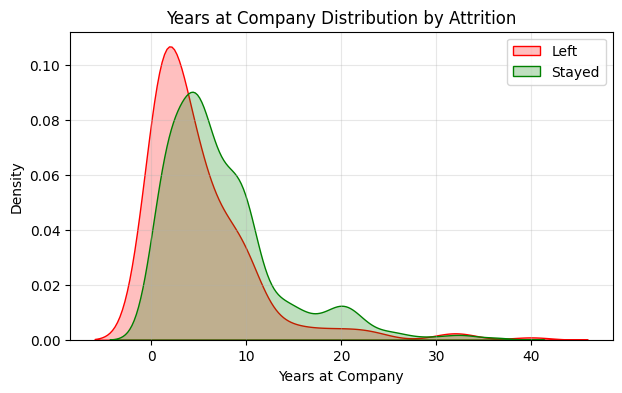

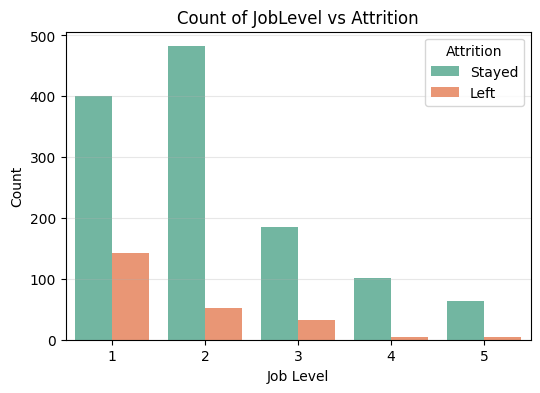

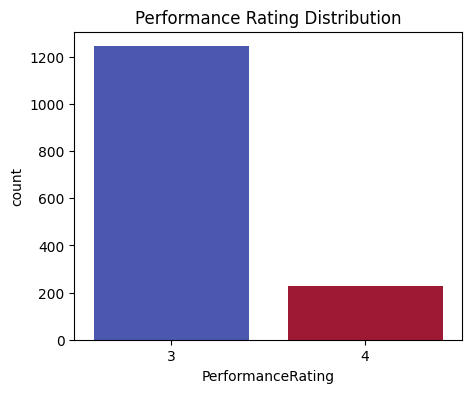

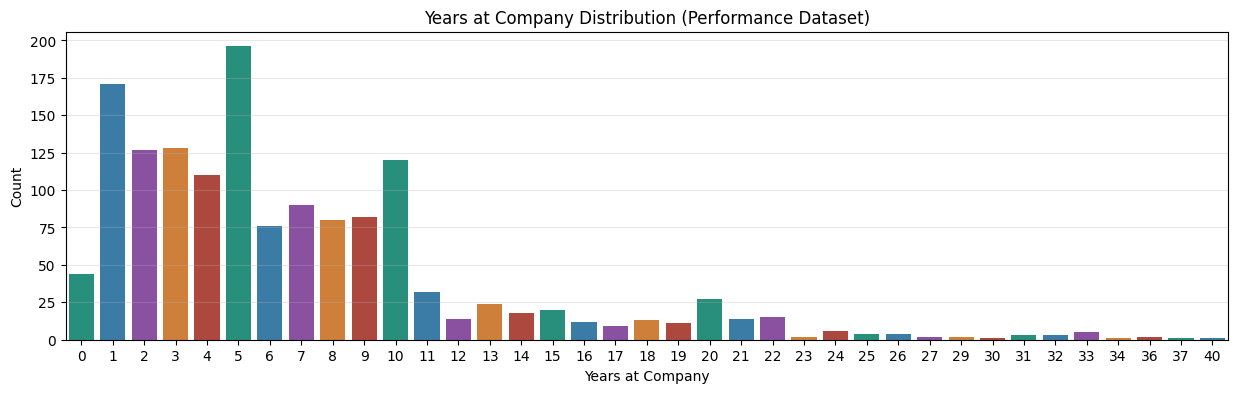

In [93]:

df_attr = df.copy()
df_perf = df.copy()

plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', data=df_attr, hue='Attrition', palette="Set2", legend=False)
plt.title(" Attrition Distribution")
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(df_attr[df_attr['Attrition']==1]['YearsAtCompany'], label='Left', fill=True, color='red')
sns.kdeplot(df_attr[df_attr['Attrition']==0]['YearsAtCompany'], label='Stayed', fill=True, color='green')
plt.title("Years at Company Distribution by Attrition")
plt.xlabel("Years at Company")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='JobLevel', hue='Attrition', data=df_attr, palette='Set2')
plt.title("Count of JobLevel vs Attrition")
plt.xlabel("Job Level")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=['Stayed','Left'])
plt.grid(axis='y', alpha=0.3)
plt.show()


# Performance Rating Distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='PerformanceRating', data=df_attr, hue='PerformanceRating', palette="coolwarm", legend=False)
plt.title("Performance Rating Distribution")
plt.show()

plt.figure(figsize=(15,4))
sns.countplot(x='YearsAtCompany', data=df_perf, palette=['#16a085','#2980b9','#8e44ad','#e67e22','#c0392b'])
plt.title("Years at Company Distribution (Performance Dataset)")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()






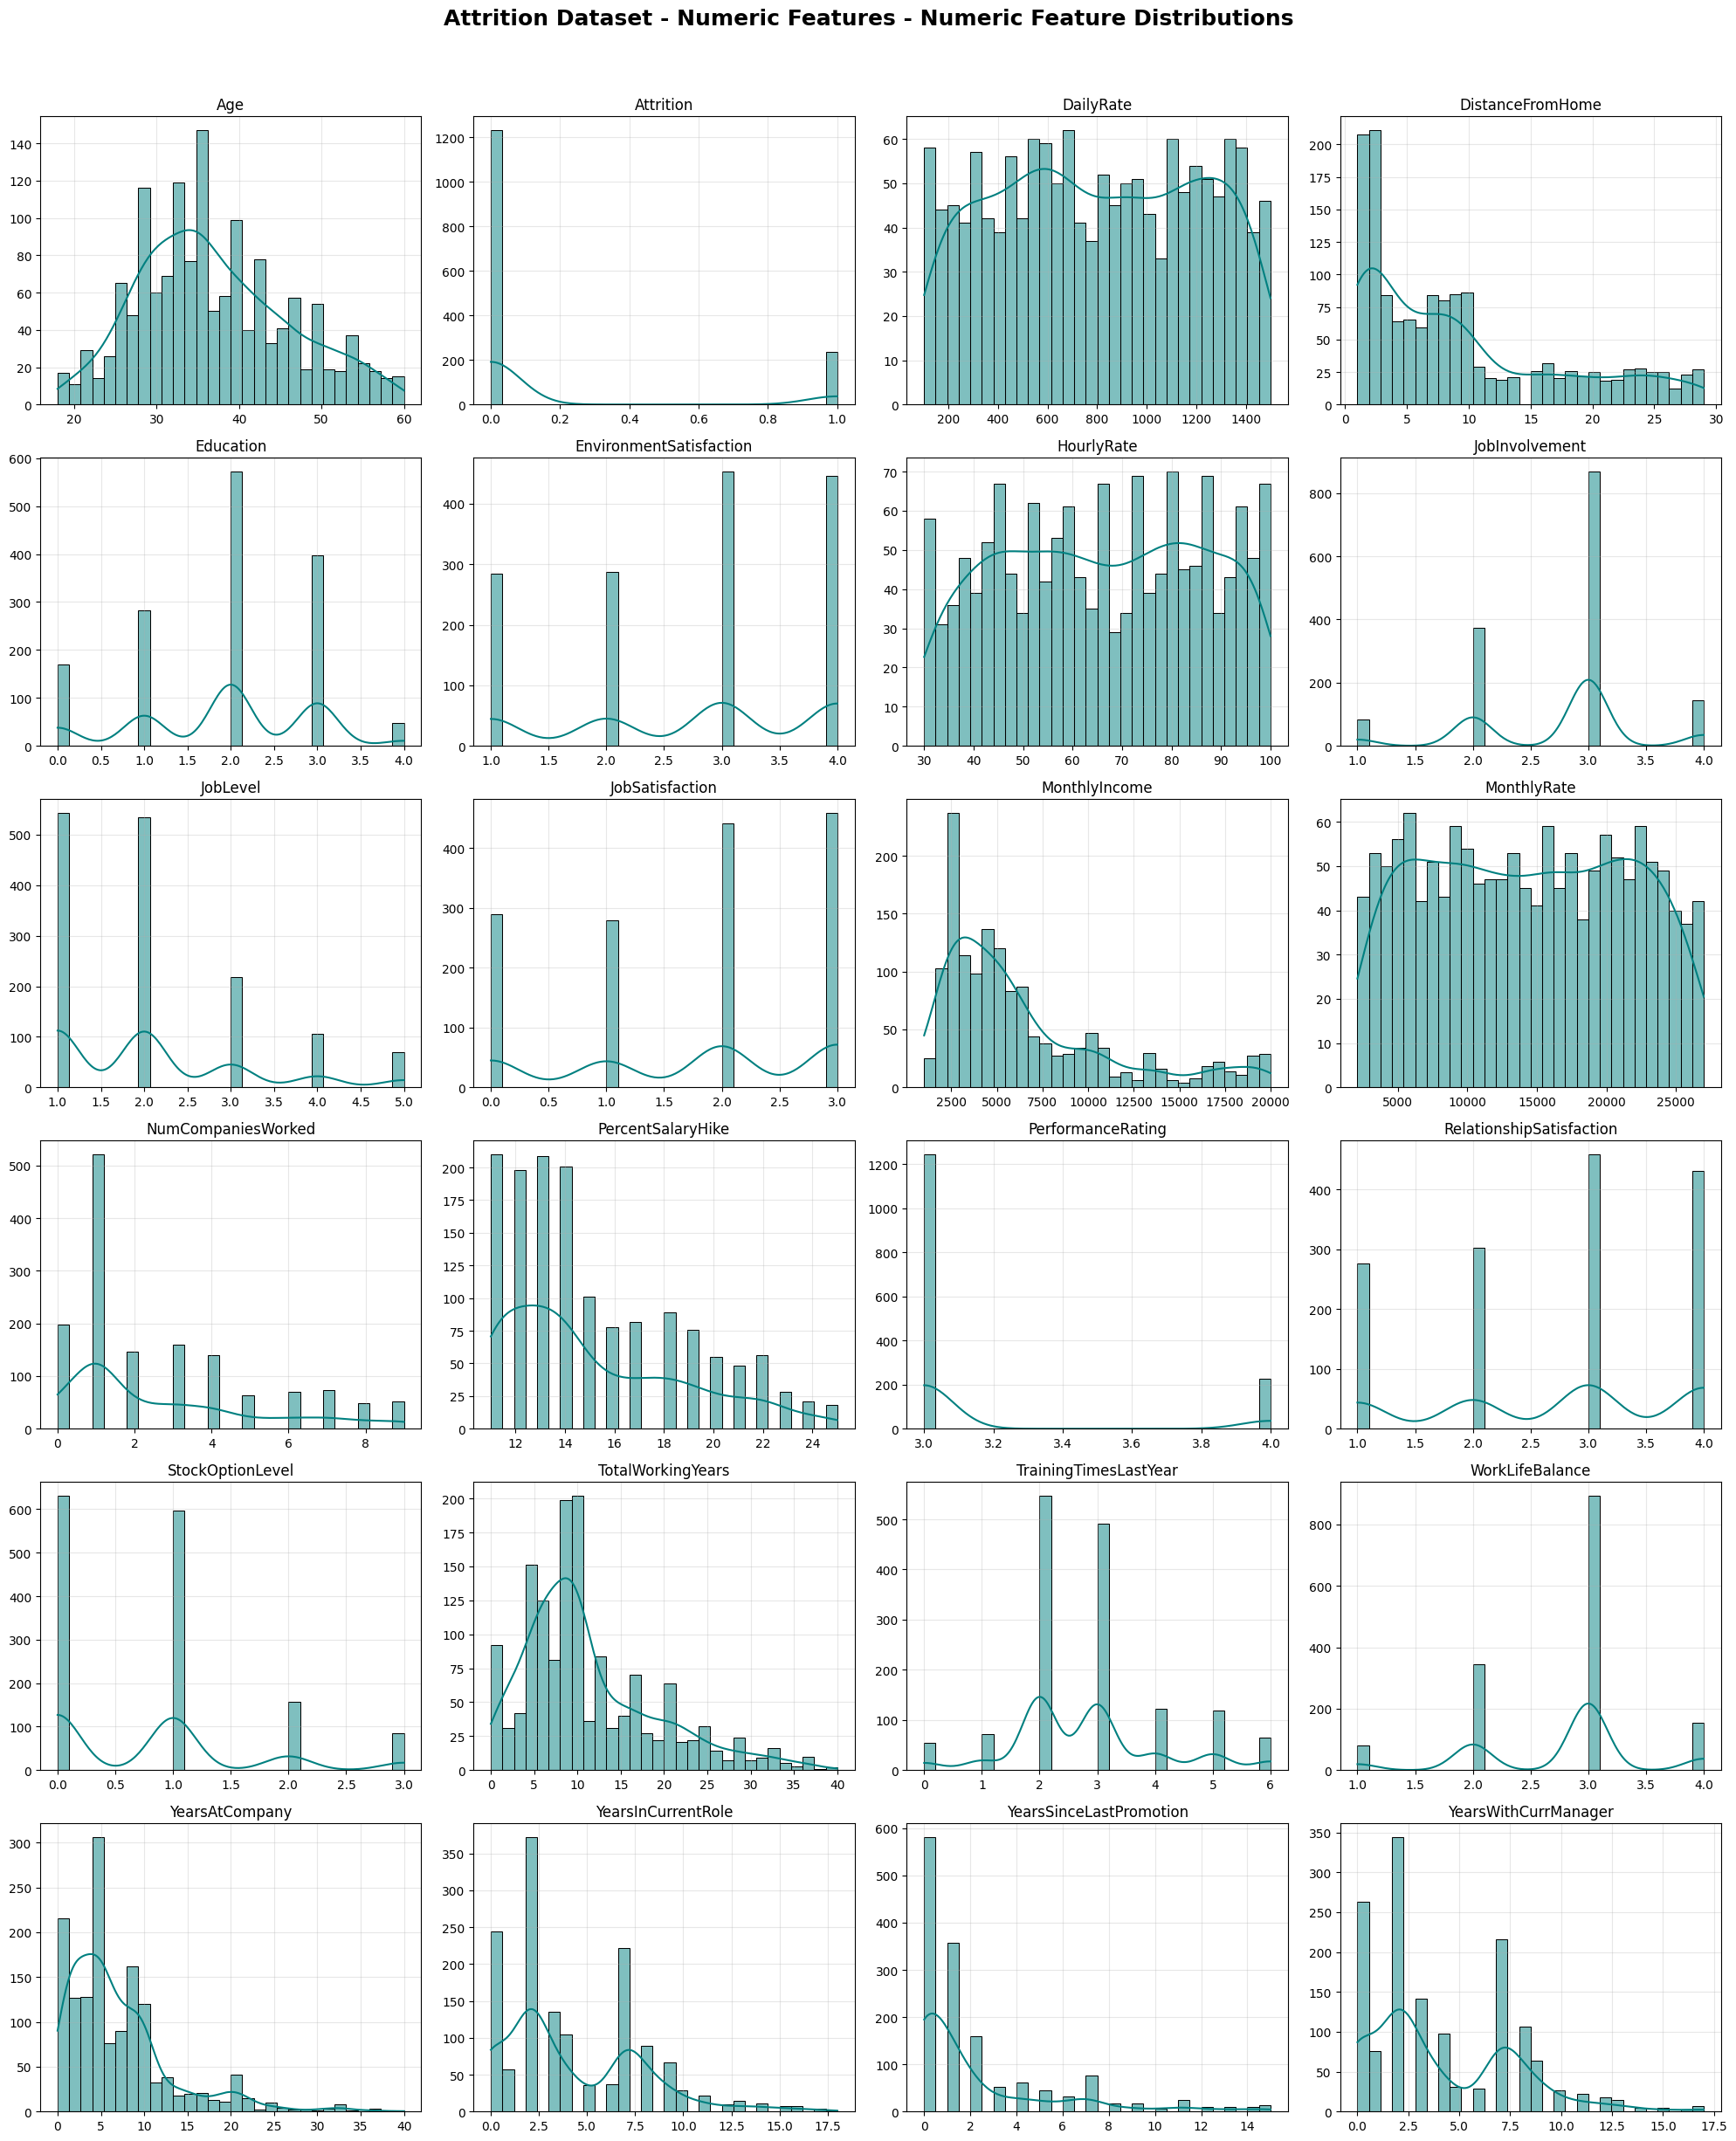

In [32]:

def plot_numeric_distributions(df, title="Dataset", cols_per_row=4):
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    if not num_cols:
        print("⚠️ No numeric columns found!")
        return
    n_cols = cols_per_row
    n_rows = (len(num_cols) + n_cols - 1) // n_cols
    plt.figure(figsize=(5*n_cols, 4*n_rows))
    plt.suptitle(f"{title} - Numeric Feature Distributions", fontsize=18, fontweight='bold', y=1.02)
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='teal')
        plt.title(col, fontsize=12)
        plt.xlabel(''); plt.ylabel('')
        plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# For numeric columns
plot_numeric_distributions(df, title="Attrition Dataset - Numeric Features")




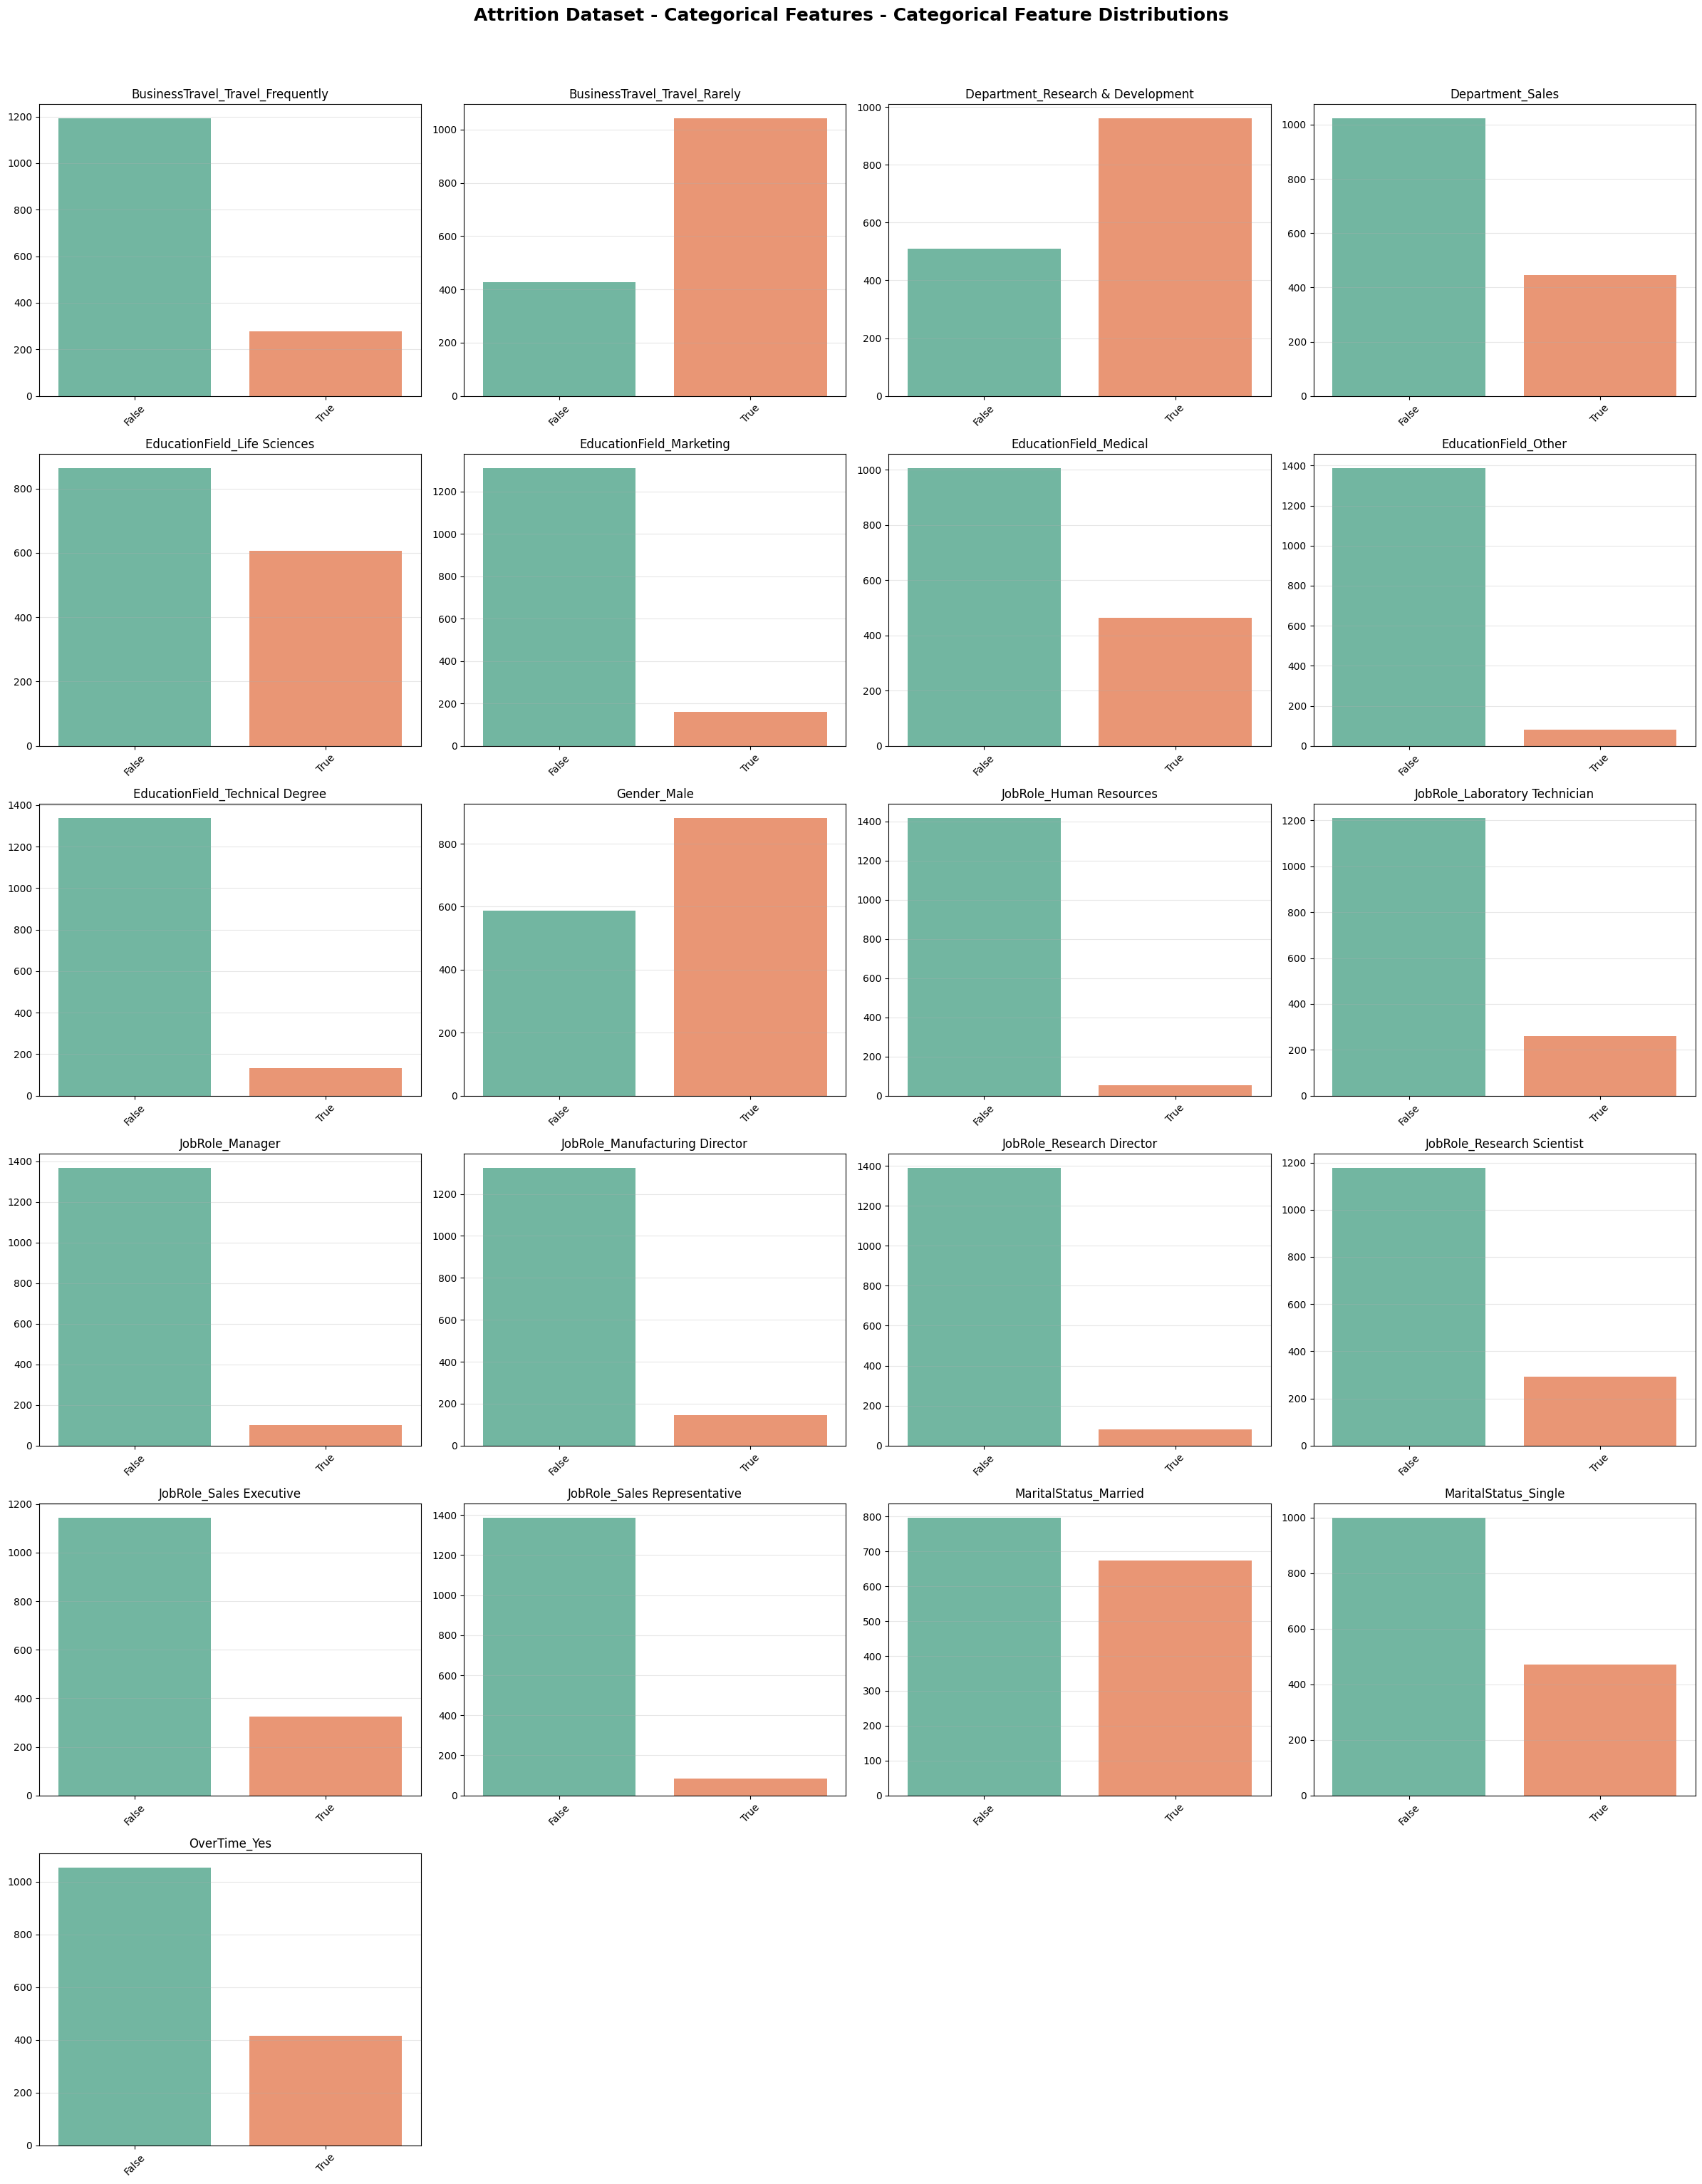

In [33]:

def plot_categorical_distributions(df, title="Dataset", cols_per_row=4):
    cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
    if not cat_cols:
        print("⚠️ No categorical columns found!")
        return
    n_cols = cols_per_row
    n_rows = (len(cat_cols) + n_cols - 1) // n_cols
    plt.figure(figsize=(6*n_cols, 5*n_rows))
    plt.suptitle(f"{title} - Categorical Feature Distributions", fontsize=18, fontweight='bold', y=1.02)
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(x=df[col], palette='Set2')
        plt.title(col, fontsize=12)
        plt.xlabel(''); plt.ylabel('')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# For categorical columns
plot_categorical_distributions(df, title="Attrition Dataset - Categorical Features")



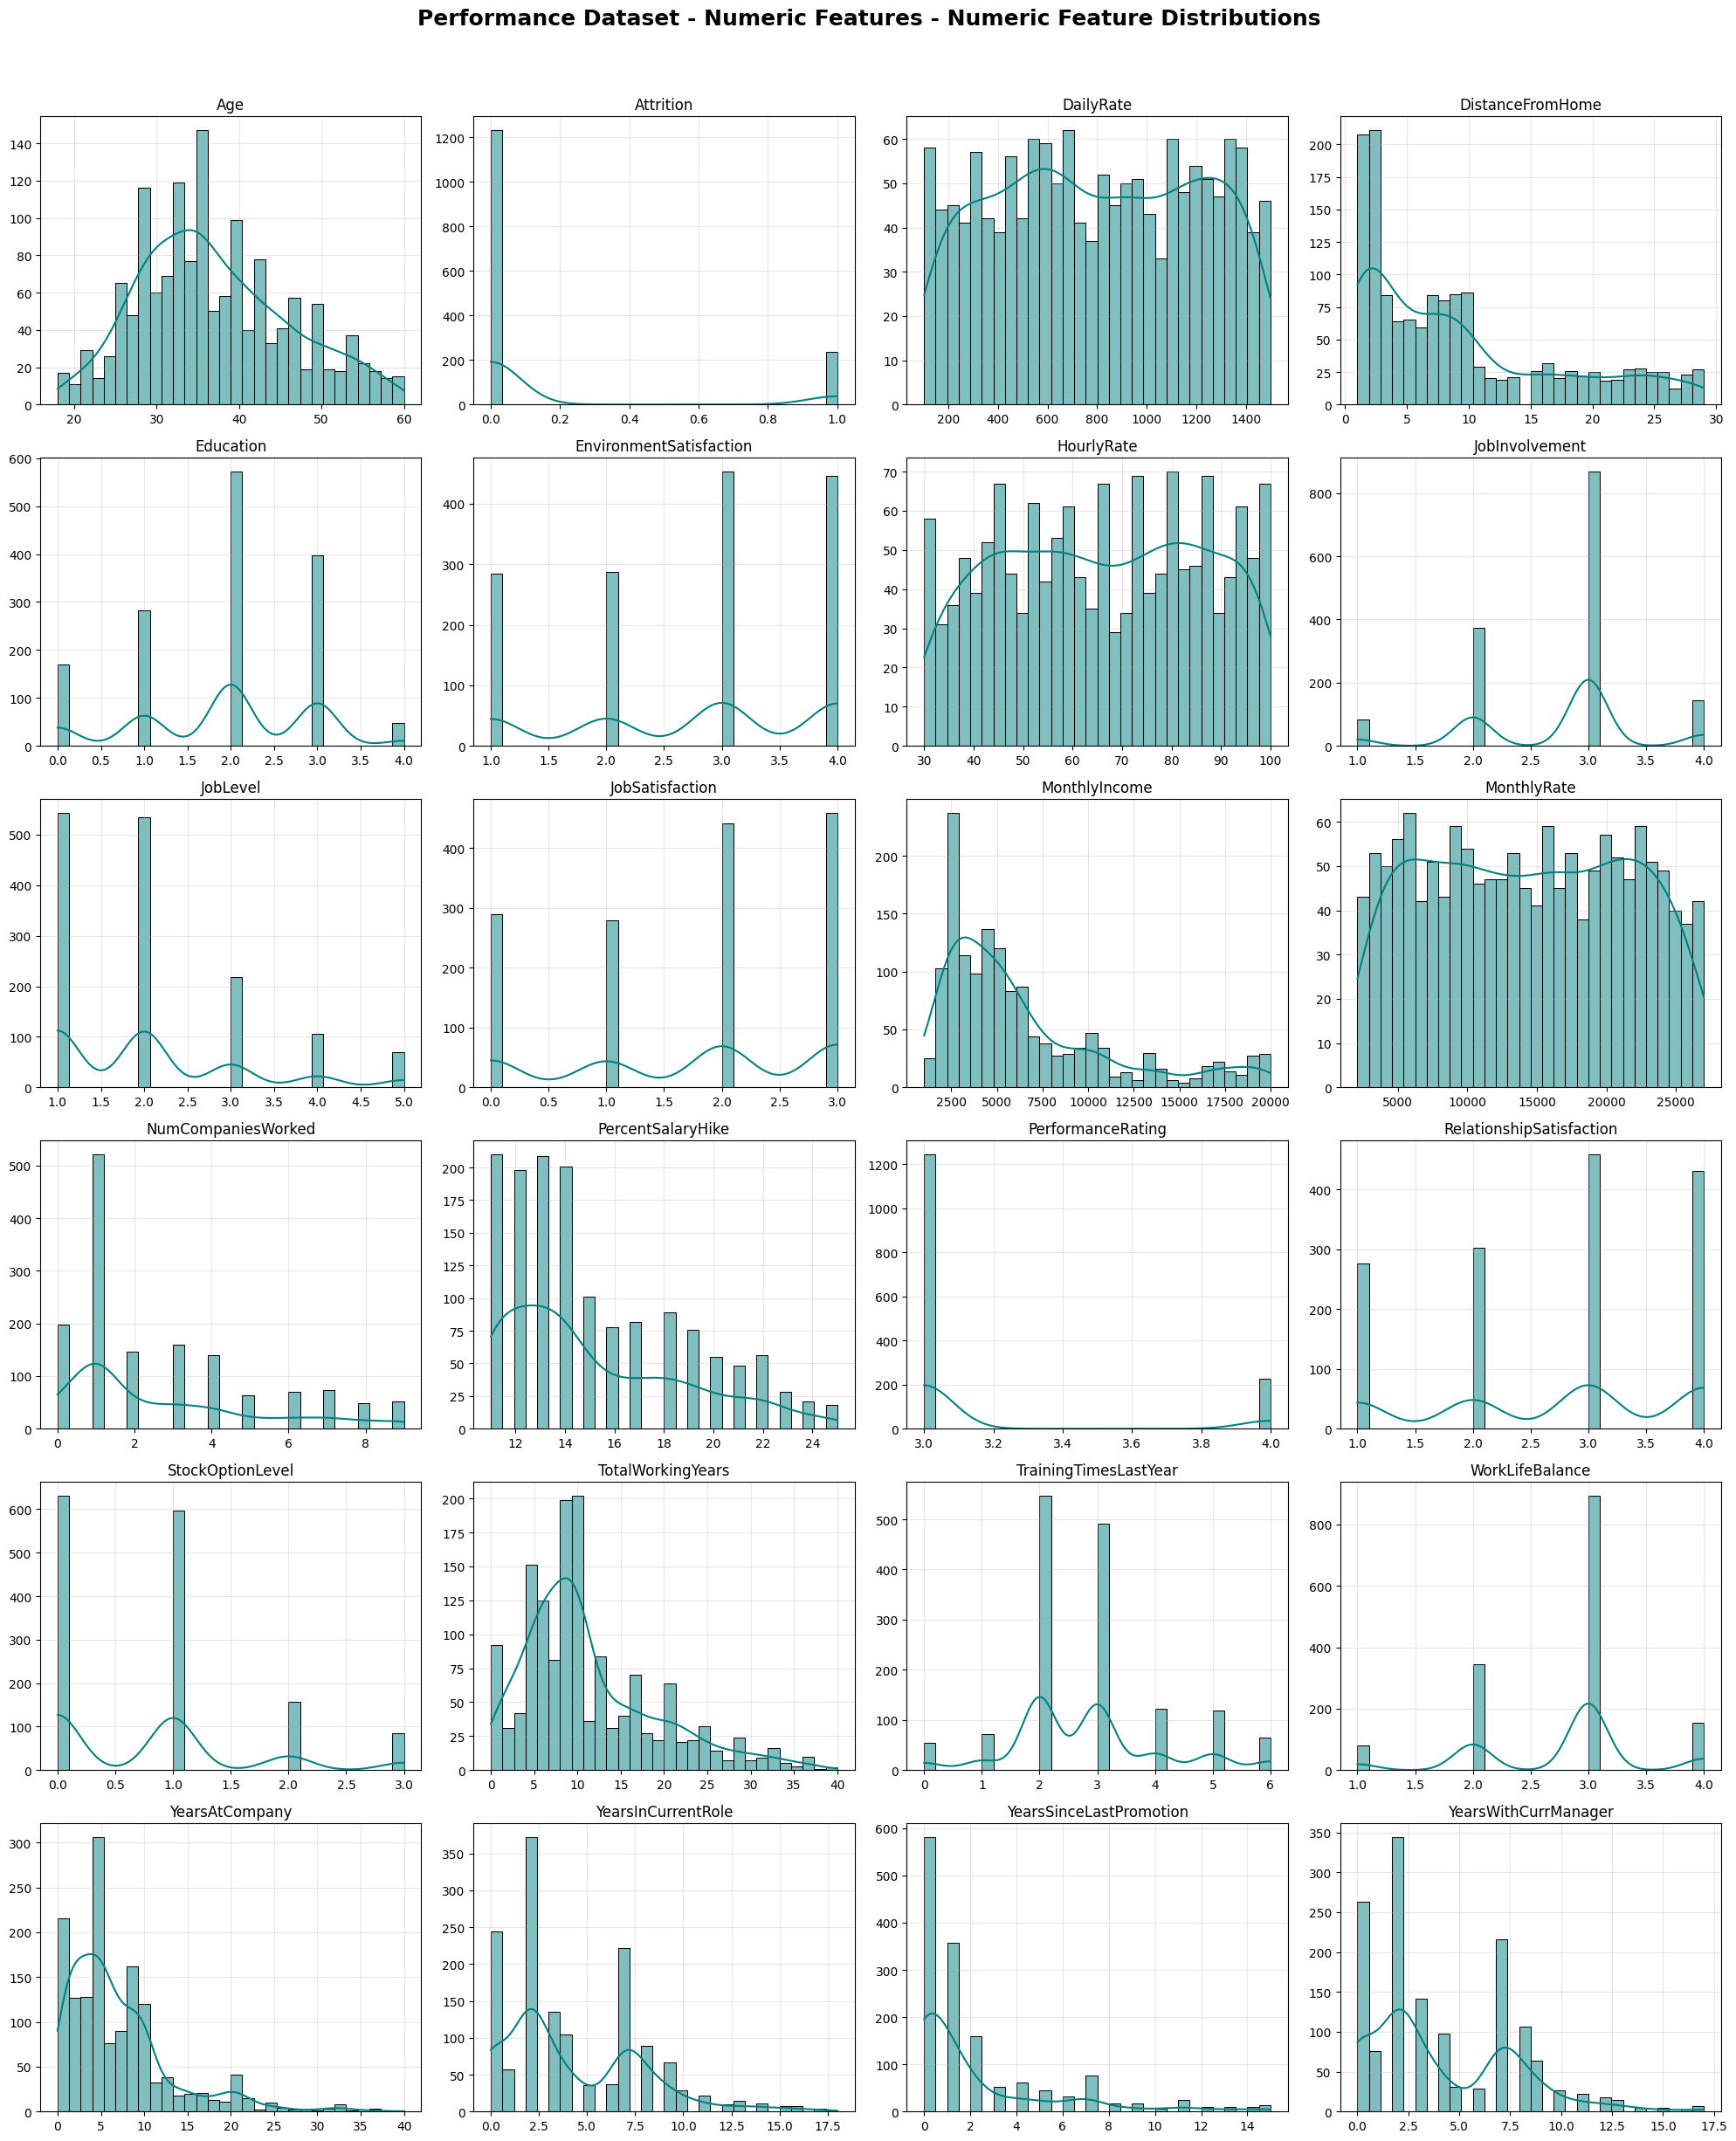

In [35]:

plot_numeric_distributions(df_perf, title="Performance Dataset - Numeric Features")

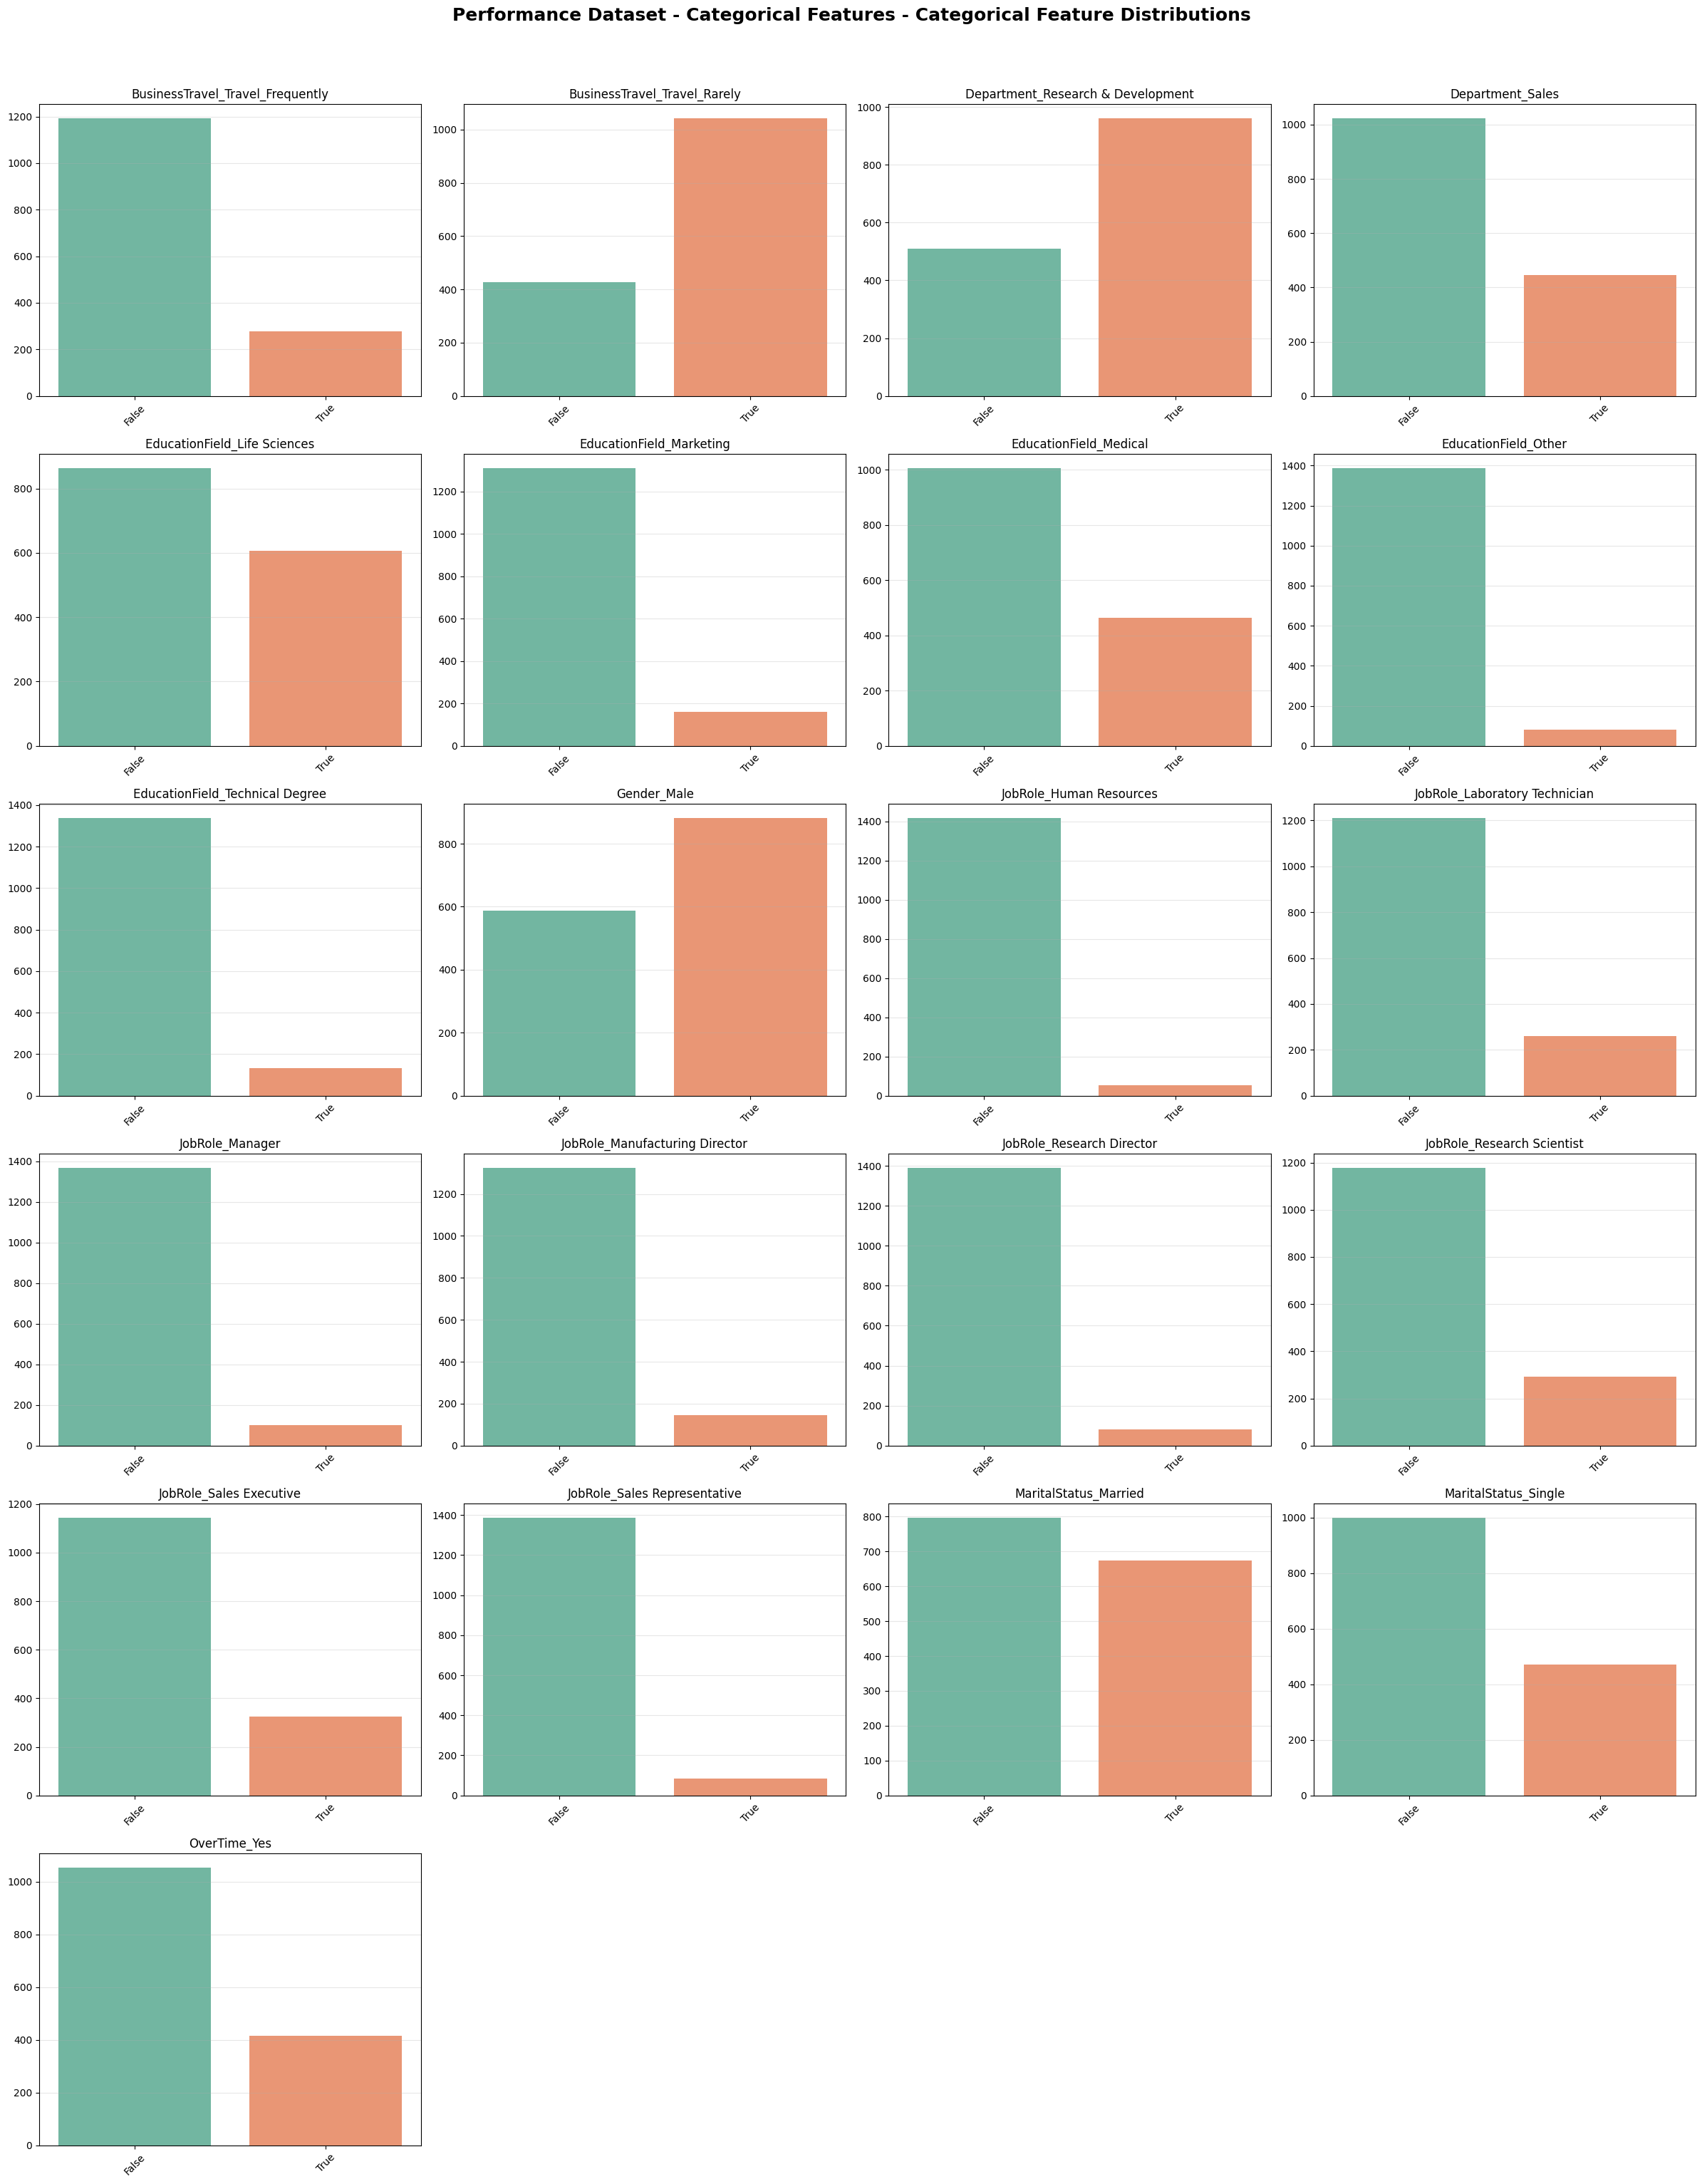

In [36]:

plot_categorical_distributions(df_perf, title="Performance Dataset - Categorical Features")

# Correlation for Feature Importance

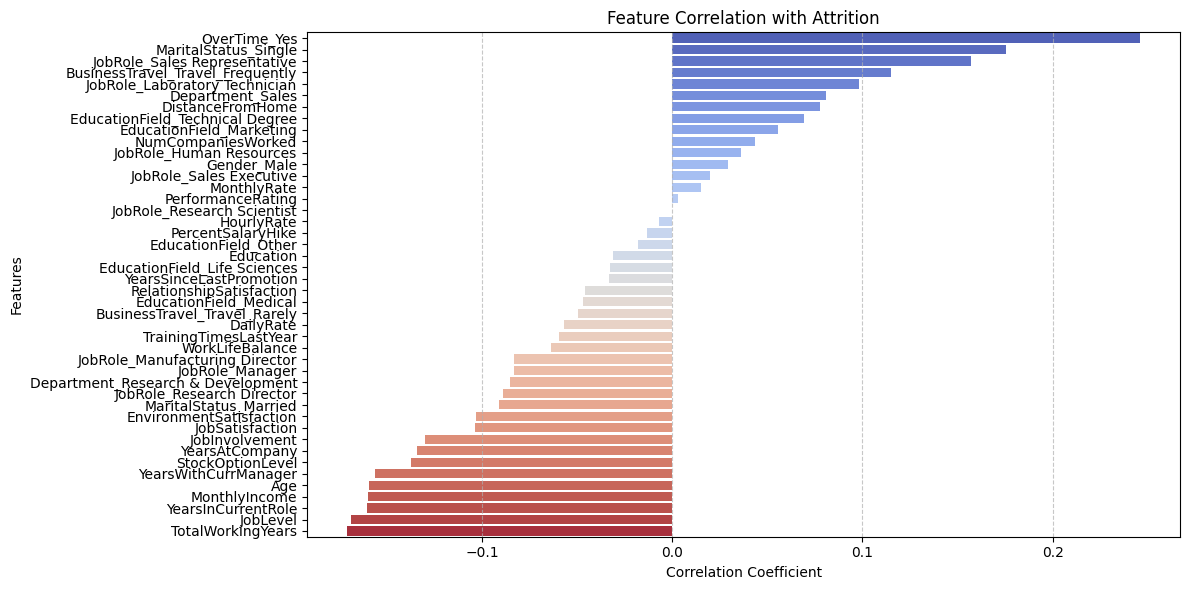

Correlation of each feature with Attrition (%):
 OverTime_Yes                         24.611799
MaritalStatus_Single                 17.541855
JobRole_Sales Representative         15.723427
BusinessTravel_Travel_Frequently     11.514277
JobRole_Laboratory Technician         9.829049
Department_Sales                      8.085520
DistanceFromHome                      7.792358
EducationField_Technical Degree       6.935459
EducationField_Marketing              5.578067
NumCompaniesWorked                    4.349374
JobRole_Human Resources               3.621508
Gender_Male                           2.945325
JobRole_Sales Executive               1.977437
MonthlyRate                           1.517021
PerformanceRating                     0.288875
JobRole_Research Scientist           -0.035957
HourlyRate                           -0.684555
PercentSalaryHike                    -1.347820
EducationField_Other                 -1.789752
Education                            -3.137282
EducationFi

In [29]:

# ==========================================================
# Correlation Analysis with Bar Chart
# ==========================================================
corr_with_target = df.corr()['Attrition'].drop('Attrition').sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')
plt.title("Feature Correlation with Attrition")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Correlation of each feature with Attrition (%):\n", corr_with_target * 100)



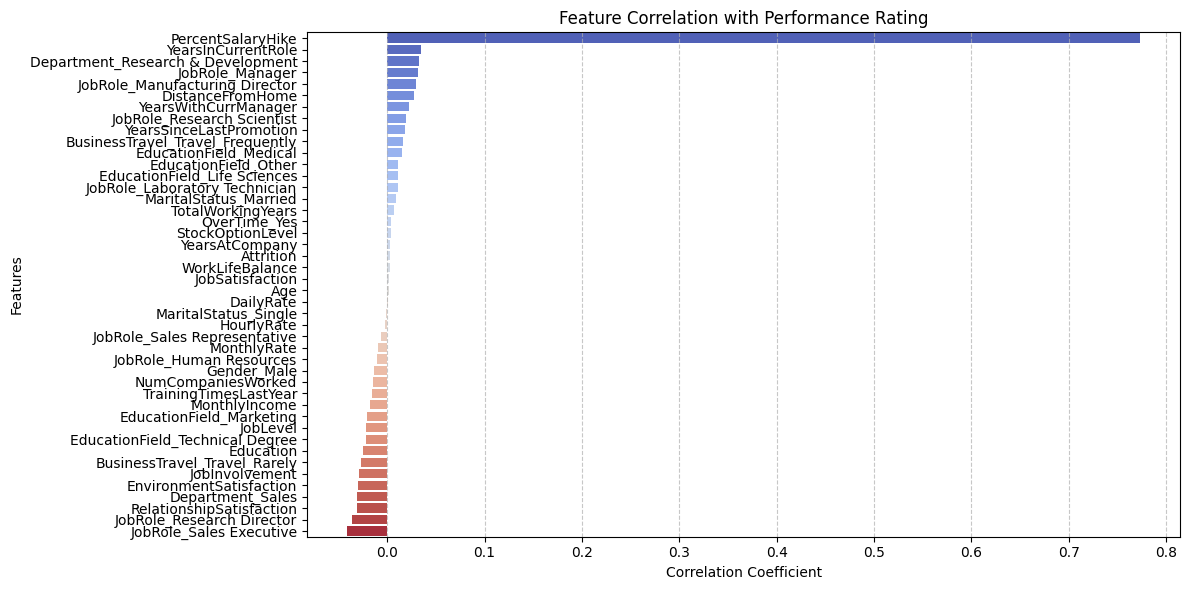

Correlation of each feature with Performance Rating (%):
 PercentSalaryHike                    77.355000
YearsInCurrentRole                    3.498626
Department_Research & Development     3.272043
JobRole_Manager                       3.205010
JobRole_Manufacturing Director        2.977486
DistanceFromHome                      2.710962
YearsWithCurrManager                  2.282717
JobRole_Research Scientist            1.941622
YearsSinceLastPromotion               1.789607
BusinessTravel_Travel_Frequently      1.646289
EducationField_Medical                1.486771
EducationField_Other                  1.144890
EducationField_Life Sciences          1.085308
JobRole_Laboratory Technician         1.079635
MaritalStatus_Married                 0.958463
TotalWorkingYears                     0.674367
OverTime_Yes                          0.436912
StockOptionLevel                      0.350647
YearsAtCompany                        0.343513
Attrition                             0.288875
Wo

In [30]:

# Correlation Analysis with Bar Chart for PerformanceRating
# ==========================================================
corr_with_target = df.corr()['PerformanceRating'].drop('PerformanceRating').sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')
plt.title("Feature Correlation with Performance Rating")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Correlation of each feature with Performance Rating (%):\n", corr_with_target * 100)


# Define Target & Selected Features

In [21]:

# ==========================================================
# Define Target & Selected Features
# ==========================================================
target_attr = 'Attrition'
features_attr = [
    'OverTime', 'MaritalStatus', 'DistanceFromHome',
    'JobRole', 'Department', 'TotalWorkingYears',
    'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome',
    'Age', 'YearsWithCurrManager', 'StockOptionLevel',
    'YearsAtCompany', 'JobInvolvement'
]
target_perf = 'PerformanceRating'
features_perf = [
    'YearsInCurrentRole', 'YearsWithCurrManager', 'YearsSinceLastPromotion',
    'TotalWorkingYears', 'DistanceFromHome', 'RelationshipSatisfaction',
    'EnvironmentSatisfaction', 'JobInvolvement'
]

X_attr = df.drop(columns=[target_attr])
y_attr = df[target_attr]

X_perf = df[features_perf]
y_perf = df['PerformanceRating']



# Feature Scaling


In [22]:
# ==========================================================
# Feature Scaling
# ==========================================================
scaler_attr = StandardScaler()
X_scaled_attr = scaler_attr.fit_transform(X_attr)

scaler_perf = StandardScaler()
X_scaled_perf = scaler_perf.fit_transform(X_perf)



# Handle Class Imbalancing

In [23]:
# ==========================================================
# Handle Class Imbalance (SMOTE)
# ==========================================================
smote = SMOTE(random_state=42)
X_res_attr, y_res_attr = smote.fit_resample(X_scaled_attr, y_attr)

print("Before SMOTE:\n", y_attr.value_counts())
print("After SMOTE:\n", y_res_attr.value_counts())

X_res_perf, y_res_perf = smote.fit_resample(X_scaled_perf, y_perf)

print("Before SMOTE:\n", y_perf.value_counts())
print("After SMOTE:\n", y_res_perf.value_counts())


Before SMOTE:
 Attrition
0    1233
1     237
Name: count, dtype: int64
After SMOTE:
 Attrition
1    1233
0    1233
Name: count, dtype: int64
Before SMOTE:
 PerformanceRating
3    1244
4     226
Name: count, dtype: int64
After SMOTE:
 PerformanceRating
3    1244
4    1244
Name: count, dtype: int64


# Train-Test Split

In [24]:

# ==========================================================
# Train-Test Split
# ==========================================================
X_train_attr, X_test_attr, y_train_attr, y_test_attr = train_test_split(
    X_res_attr, y_res_attr, test_size=0.2, random_state=42, stratify=y_res_attr
)
print("Train Shape:", X_train_attr.shape)
print("Test Shape:", X_test_attr.shape)

X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(
    X_res_perf, y_res_perf, test_size=0.2, random_state=42, stratify=y_res_perf
)
print("Train Shape:", X_train_perf.shape)
print("Test Shape:", X_test_perf.shape)


Train Shape: (1972, 44)
Test Shape: (494, 44)
Train Shape: (1990, 8)
Test Shape: (498, 8)


# Function: Train and Evaluate Multiple Models



In [60]:
# ==========================================================
# Function: Train and Evaluate Multiple Models
# ==========================================================

def train_and_evaluate_models(X_train, y_train, X_test, y_test,target_name):
    """
    Train and evaluate multiple ML models on the given dataset.
    Returns a dictionary with accuracy, AUROC, and classification reports.
    """
    print("\n==============================")
    print(f"🚀 Training and Evaluating Models for: {target_name}")
    print("==============================")

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
        "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
        "Naive Bayes": GaussianNB(),
        "SVM": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
    }

    results = {}

    for name, model in models.items():
        print(f"\n==============================")
        print(f"🧠 {name}")
        print("==============================")

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
        report = classification_report(y_test, y_pred)

        print(f"{name} Accuracy: {acc * 100:.2f}%")
        if auc is not None:
            print(f"{name} AUROC: {auc:.4f}")
        print("Classification Report:\n", report)

        results[name] = {
            "model": model,
            "accuracy": acc,
            "auc": auc,
            "report": report
        }

    print("\n==============================")
    print(" Model Training Completed")
    print("==============================")

    return results

# Train and evaluate for Attrition and Performance
results_attr = train_and_evaluate_models(X_train_attr, y_train_attr, X_test_attr, y_test_attr, target_name="Employee Attrition")



🚀 Training and Evaluating Models for: Employee Attrition

🧠 Logistic Regression
Logistic Regression Accuracy: 82.19%
Logistic Regression AUROC: 0.8818
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       247
           1       0.80      0.85      0.83       247

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494


🧠 Random Forest
Random Forest Accuracy: 93.12%
Random Forest AUROC: 0.9718
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       247
           1       0.95      0.91      0.93       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


🧠 Decision Tree
Decision Tree Accuracy: 88.87%
Decision Tree AUROC: 0

In [61]:
results_perf = train_and_evaluate_models(X_train_perf, y_train_perf, X_test_perf, y_test_perf, target_name="Performance Rating")


🚀 Training and Evaluating Models for: Performance Rating

🧠 Logistic Regression
Logistic Regression Accuracy: 54.42%
Logistic Regression AUROC: 0.5786
Classification Report:
               precision    recall  f1-score   support

           3       0.54      0.55      0.55       249
           4       0.54      0.54      0.54       249

    accuracy                           0.54       498
   macro avg       0.54      0.54      0.54       498
weighted avg       0.54      0.54      0.54       498


🧠 Random Forest
Random Forest Accuracy: 92.57%
Random Forest AUROC: 0.9628
Classification Report:
               precision    recall  f1-score   support

           3       0.89      0.97      0.93       249
           4       0.96      0.88      0.92       249

    accuracy                           0.93       498
   macro avg       0.93      0.93      0.93       498
weighted avg       0.93      0.93      0.93       498


🧠 Decision Tree
Decision Tree Accuracy: 80.92%
Decision Tree AUROC: 0

# ⚙️ Function: Hyperparameter Tuning for Multiple Models

In [26]:

# ==========================================================
# ⚙️ Function: Hyperparameter Tuning for Multiple Models
# ==========================================================
def tune_models(X_train, y_train, X_test, y_test, target_name="Target"):
    print("\n==============================")
    print(f"🔧 Hyperparameter Tuning for {target_name} Dataset")
    print("==============================")

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
        "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
        "Naive Bayes": GaussianNB(),
        "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
        "KNN": KNeighborsClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42)
    }

    param_grids = {
        "Logistic Regression": {"C": [0.01, 0.1, 1, 10], "solver": ["lbfgs", "liblinear"]},
        "Random Forest": {"n_estimators": [100, 200, 300], "max_depth": [4, 6, 8, None]},
        "Decision Tree": {"max_depth": [4, 6, 8, None]},
        "Naive Bayes": {},  # no hyperparameters to tune
        "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
        "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
        "Gradient Boosting": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.05, 0.1]}
    }

    best_models = {}

    # ==========================================================
    # 🔁 Iterate and Tune Each Model
    # ==========================================================
    for name, model in models.items():
        print(f"\n▶️ Tuning {name}...")

        params = param_grids.get(name, {})
        if not params:
            print(f"⚠️ {name} has no hyperparameters to tune. Using default model.")
            model.fit(X_train, y_train)
            best_model = model
        else:
            grid = GridSearchCV(
                estimator=model,
                param_grid=params,
                cv=5,
                scoring='roc_auc',
                n_jobs=-1,
                verbose=0
            )
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            print(f"✅ Best Parameters for {name}: {grid.best_params_}")

        best_models[name] = best_model

        # ================= Evaluation =================
        y_pred = best_model.predict(X_test)

        # Handle both probability and decision function models
        if hasattr(best_model, "predict_proba"):
            y_proba = best_model.predict_proba(X_test)[:, 1]
        else:
            y_proba = best_model.decision_function(X_test)

        print(f"📊 Accuracy: {accuracy_score(y_test, y_pred):.3f}")
        print(f"🎯 AUC: {roc_auc_score(y_test, y_proba):.3f}")
        print(classification_report(y_test, y_pred, zero_division=0))

    # ==========================================================
    # ✅ Summary
    # ==========================================================
    print("\n==============================")
    print(f"🏁 Hyperparameter Tuning Completed for {target_name}")
    print("==============================")

    return best_models


# ==========================================================
# 📊 Example Usage for Multiple Targets
# ==========================================================
best_models_attr = tune_models(X_train_attr, y_train_attr, X_test_attr, y_test_attr, target_name="Attrition")
best_models_perf = tune_models(X_train_perf, y_train_perf, X_test_perf, y_test_perf, target_name="Performance Rating")


🔧 Hyperparameter Tuning for Attrition Dataset

▶️ Tuning Logistic Regression...
✅ Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
📊 Accuracy: 0.832
🎯 AUC: 0.883
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       247
           1       0.82      0.86      0.84       247

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494


▶️ Tuning Random Forest...
✅ Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 300}
📊 Accuracy: 0.933
🎯 AUC: 0.973
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       247
           1       0.95      0.91      0.93       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


▶️ Tuning Decision Tree